<a href="https://colab.research.google.com/github/bsmoores/AI-portfolio/blob/main/Lab10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup

### Imports

In [ ]:
import numpy as np # Importing NumPy library with the alias np, which is commonly used for numerical computations and array manipulation.
import matplotlib.pyplot as plt #Importing the pyplot module from Matplotlib library with the alias plt, which is commonly used for creating visualizations such as plots and graphs.
import urllib.request #Importing the urllib library for working with URLs, specifically for making requests to web servers.
from PIL import Image #Importing the Image module from the Python Imaging Library (PIL), which is commonly used for image processing tasks.
from imageio import * #Importing all symbols from the imageio module, which is commonly used for reading and writing image data.
import torch #Importing PyTorch library, which is commonly used for deep learning tasks such as building and training neural networks.
from skimage.transform import resize #Importing the resize function from the scikit-image library, which is commonly used for image processing tasks.
from mpl_toolkits.axes_grid1.axes_rgb import make_rgb_axes, RGBAxes #Importing functions/classes related to RGB axes from Matplotlib.
from torchvision.models import * #Importing all symbols from the torchvision.models module, which provides pre-trained deep learning models for computer vision tasks.
from torchvision.datasets import MNIST,KMNIST,FashionMNIST #Importing classes for common datasets from torchvision.datasets module, including MNIST, KMNIST, and FashionMNIST datasets.
from skimage.util import montage #Importing the montage function from the scikit-image library, which is used to create a composite image from a collection of images.

In [ ]:
!pip install wandb
import wandb as wb # is a tool used for experiment tracking, visualization, and collaboration in machine learning projects.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.5/258.5 kB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.4 MB/s eta 0:00:00


In [ ]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show() #visualizing tensors or arrays, especially in the context of image data represented as matrices. If x represents an image, it will be displayed as a grayscale image.

In [ ]:
def montage_plot(x):
    x = np.pad(x, pad_width=((0, 0), (1, 1), (1, 1)), mode='constant', constant_values=0)
    plot(montage(x)) #The montage helps in quickly inspecting a collection of images.

In [ ]:
b = 1000

def get_batch(mode):
    if mode == "train":
        r = np.random.randint(X.shape[0]-b)
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y
    #This function can be used in machine learning models, particularly during the training and evaluation phases, to efficiently generate batches of data. Generating batches helps in training models in mini-batch fashion, which is often more memory efficient and can lead to faster convergence during training.


## MNIST
    

### Load Data

In [ ]:
# #MNIST
train_set = MNIST('./data', train=True, download=True)
test_set  = MNIST('./data', train=False, download=True)
#training and evaluating machine learning models, particularly for tasks related to handwritten digit recognition using deep learning techniques.
#KMNIST
# train_set = KMNIST('./data', train=True, download=True)
# test_set =  KMNIST('./data', train=False, download=True)

# Fashion MNIST
# train_set = FashionMNIST('./data', train=True, download=True)
# test_set =  FashionMNIST('./data', train=False, download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 379662590.01it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 38887863.19it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 176660146.03it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 7014185.85it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
X = train_set.data.numpy() #Extracts the image data from the training set (train_set) and converts it to a NumPy array. Each image in the training set is represented as a 28x28 array of pixel values.
X_test = test_set.data.numpy() #Extracts the image data from the test set (test_set) and converts it to a NumPy array.
Y = train_set.targets.numpy() #Extracts the labels from the training set (train_set) and converts them to a NumPy array. Each label corresponds to the digit represented by the respective image in the training set.
Y_test = test_set.targets.numpy() # Extracts the labels from the test set (test_set) and converts them to a NumPy array.

X = X[:,None,:,:]/255 #Reshapes the training images array X to add a singleton dimension at the second position.
X_test = X_test[:,None,:,:]/255 #Reshapes the test images array X_test and scales down its pixel values in the same manner as for the training set.

In [ ]:
X.shape #Executing this code will output the shape of the training image data X.

(60000, 1, 28, 28)

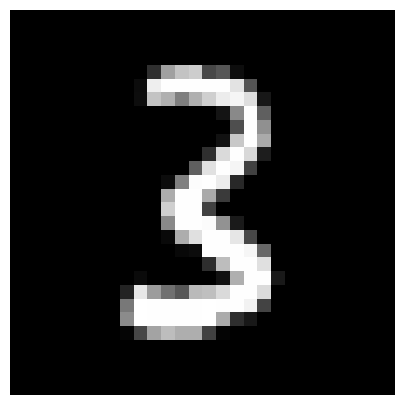

In [ ]:
plot(X[50000,0,:,:]) #extracts the 2D array representing the image (ignoring the channel dimension), and passes it to the plot function for visualization.

In [ ]:
Y[100] #will print the label corresponding to the image at index 100 in the training data. The label represents the digit class (0 to 9) that the image belongs to according to the MNIST dataset.

5

In [ ]:
X[0:25,0,:,:].shape #the output shape of this expression will be (25, 28, 28), indicating that there are 25 images, each with dimensions 28x28 pixels.

(25, 28, 28)

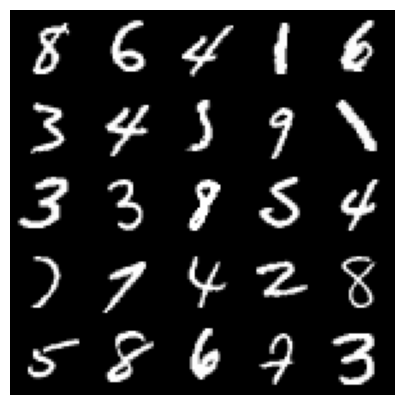

In [ ]:
montage_plot(X[125:150,0,:,:]) #selects images from index 125 to 149 (inclusive) from the training data X, extracts their pixel values, and then creates a montage plot of these images using the montage_plot function.

In [ ]:
X.shape[0] #Executing this code will output the number of samples in the training data X. This value represents the total number of images available for training in the MNIST dataset.

60000

In [ ]:
X_test.shape #Executing this code will output the shape of the test image data X_test. This shape indicates the number of samples (images) in the test set, as well as the dimensions of each image. It should be in the form (N_test, 1, 28, 28), where N_test is the number of samples in the test set.

(10000, 1, 28, 28)

In [ ]:
X.shape[0] #Executing this code will output the number of samples in the training data X. This value represents the total number of images available for training in the MNIST dataset.

60000

In [ ]:
X_test.shape[0] #Executing this code will output the number of samples in the test data X_test. This value represents the total number of images available for testing in the MNIST dataset.

10000

In [ ]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))
#This function takes data as input and returns a PyTorch tensor representing the data, stored on the GPU (if available). It sets the tensor to require gradients (useful for training) and specifies the data type as float. If a GPU is not available, it will default to using the CPU.
def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))
    # Similar to GPU, this function also takes data as input and returns a PyTorch tensor representing the data, stored on the GPU (if available). However, it differs in that it does not set the tensor to require gradients, making it suitable for data that does not need gradient tracking, such as input features or labels.

In [ ]:
X = GPU_data(X)
Y = GPU_data(Y)
X_test = GPU_data(X_test)
Y_test = GPU_data(Y_test)
#By performing these conversions and moving the data to the GPU, the code prepares the data for training and testing deep learning models efficiently on GPU hardware.

In [ ]:
X = X.reshape(X.shape[0],784)
X_test = X_test.reshape(X_test.shape[0],784)
#After these reshaping operations, each row in the reshaped tensors X and X_test represents a flattened image vector with 784 elements, suitable for feeding into machine learning models as input features.


### Classifier


In [ ]:
x,y = get_batch('train') #The returned x and y will contain the input features and target labels for the batch of training data, respectively. These can then be used for training machine learning models.

In [ ]:
x.shape #The shape of the variable x depends on the batch size and the dimensionality of the data in the training set.

torch.Size([1000, 784])

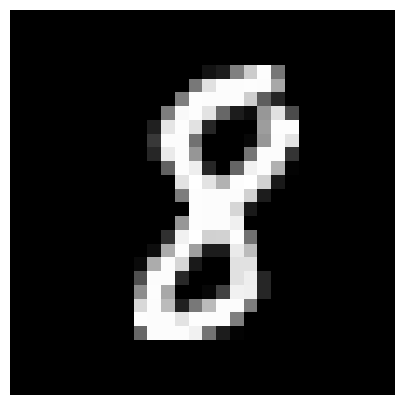

In [ ]:
plot(x[0].reshape(28,28)) #This code selects the first sample from the batch of input features x, reshapes it to the original 28x28 image dimensions, and then passes it to the plot function for visualization. This will display the image corresponding to the first sample in the batch.

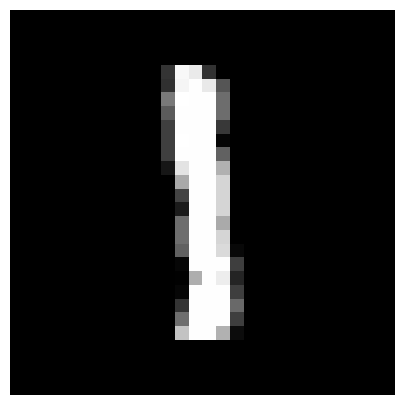

In [ ]:
plot(x[1].reshape(28,28)) #This will display the image corresponding to the second sample in the batch.

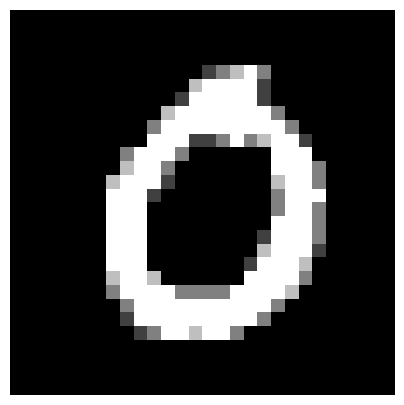

In [ ]:
plot(x[2].reshape(28,28)) #This will display the image corresponding to the second sample in the batch.

In [ ]:
y[:10] #Executing this code will output the first 10 elements of the array or tensor y, which represent the target labels for the corresponding samples in the batch

tensor([8., 1., 0., 2., 9., 3., 8., 4., 8., 5.], device='cuda:0')

In [ ]:
W = GPU(np.random.randn(784,10)) #the code initializes and prepares the weight matrix W for use in a neural network, typically as the weights of a fully connected (dense) layer mapping input features to output classes.

In [ ]:
x.shape, W.shape #These shapes indicate the dimensions of the input features and the weight matrix, respectively, which are crucial for performing matrix multiplication operations and forward passes through the neural network layers.

(torch.Size([1000, 784]), torch.Size([784, 10]))

In [ ]:
torch.matmul(x,W).shape #These shapes indicate the dimensions of the input features and the weight matrix, respectively, which are crucial for performing matrix multiplication operations and forward passes through the neural network layers.

torch.Size([1000, 10])

In [ ]:
(x@W).shape #This indicates that each row in the resulting matrix represents the output probabilities or logits for each class for the corresponding sample in the batch. Each row corresponds to a sample, and each column corresponds to a class.

torch.Size([1000, 10])

In [ ]:
%%timeit
x@W
#Executing this code cell will output the average execution time of the matrix multiplication operation x @ W over multiple runs, providing insights into the computational efficiency of this operation.

20.6 µs ± 197 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
x@W #This will compute the dot product of x and W and print the resulting tensor.

tensor([[19.6333, -3.4147,  3.0646,  ...,  8.3340, -6.3899, -0.1115],
        [15.0560,  5.0470,  6.7607,  ..., -2.6865, -5.7382,  9.6146],
        [18.3034, 16.8624,  6.2212,  ..., 23.0545,  3.3544,  0.5259],
        ...,
        [16.4164,  4.1767, 17.6385,  ..., -0.9494, -3.3632, 10.8070],
        [ 6.5019,  1.1557, 12.0853,  ..., -7.5539, -0.4298,  6.1122],
        [ 5.9316, 10.8584, 11.5215,  ...,  3.4697,  8.7993,  8.0716]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [ ]:
y2 = x@W #variable y2 as you've done (y2 = x @ W) will compute the dot product of the input features x and the weight matrix W and store the result in the variable y2.

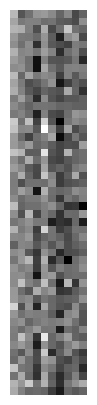

In [ ]:
plot(y2[:50]) #The plot function will then display the logits or probabilities for each class for the first 50 samples in the batch.

In [ ]:
y #represent the ground truth classes for the corresponding samples in the batch of input features x.

tensor([8., 1., 0., 2., 9., 3., 8., 4., 8., 5., 0., 8., 7., 9., 2., 0., 5., 1.,
        0., 2., 9., 3., 2., 4., 8., 5., 1., 6., 8., 7., 3., 8., 6., 9., 9., 0.,
        3., 1., 9., 2., 4., 3., 0., 4., 2., 5., 5., 8., 1., 5., 5., 2., 2., 1.,
        9., 7., 6., 2., 1., 4., 6., 1., 0., 4., 6., 1., 6., 4., 5., 9., 6., 6.,
        8., 8., 6., 4., 1., 5., 5., 3., 8., 7., 4., 8., 1., 4., 6., 3., 6., 3.,
        7., 5., 4., 0., 6., 6., 7., 1., 6., 6., 5., 8., 8., 7., 0., 0., 0., 1.,
        1., 5., 8., 6., 4., 0., 0., 8., 2., 5., 2., 0., 3., 6., 1., 1., 7., 5.,
        5., 8., 1., 4., 0., 7., 4., 6., 3., 9., 8., 1., 5., 9., 7., 7., 6., 1.,
        7., 2., 6., 3., 3., 4., 2., 5., 2., 5., 1., 3., 3., 7., 1., 3., 0., 1.,
        9., 8., 3., 2., 5., 2., 8., 3., 4., 2., 0., 7., 9., 4., 2., 9., 8., 9.,
        4., 2., 7., 8., 7., 1., 9., 8., 4., 3., 8., 8., 2., 3., 5., 6., 2., 7.,
        2., 0., 9., 4., 3., 0., 3., 0., 7., 1., 7., 2., 5., 3., 2., 4., 8., 5.,
        8., 6., 7., 7., 2., 8., 9., 9., 

In [ ]:
y.shape #output the shape of the target labels y for the current batch. It will be in the form (batch_size,), where batch_size is the number of samples in the batch. Each element in y represents the target label for the corresponding sample in x.

torch.Size([1000])

In [ ]:
def one_hot(y):
    y2 = GPU_data(torch.zeros((y.shape[0],10)))
    for i in range(y.shape[0]):
        y2[i,int(y[i])] = 1
    return y2
    #converting categorical target labels into a format that is suitable for training classification models, particularly those using deep learning frameworks like PyTorch.

In [ ]:
one_hot(y) #generate one-hot encoded vectors for each target label in y and store them in the variable one_hot_y. Each row in one_hot_y represents the one-hot encoded vector corresponding to a target label in y.

<ipython-input-19-c3d856de2607>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))


tensor([[0., 0., 0.,  ..., 0., 1., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 1., 0., 0.]], device='cuda:0')

In [ ]:
torch.argmax(y2,1) #will compute the indices of the maximum values along the second dimension of y2 (dimension 1), effectively obtaining the predicted class labels for each sample in the batch.

tensor([0, 0, 7, 8, 4, 0, 0, 4, 0, 0, 0, 1, 0, 8, 4, 4, 5, 9, 4, 2, 4, 4, 5, 4,
        4, 0, 2, 2, 4, 2, 1, 1, 2, 4, 5, 1, 3, 0, 0, 0, 1, 3, 4, 8, 4, 4, 0, 1,
        2, 0, 0, 0, 2, 0, 2, 2, 4, 4, 0, 0, 1, 0, 7, 0, 1, 0, 4, 2, 5, 0, 0, 3,
        4, 4, 3, 4, 0, 1, 1, 4, 7, 0, 1, 4, 2, 1, 5, 8, 0, 0, 0, 0, 3, 4, 0, 0,
        2, 0, 4, 0, 4, 4, 4, 2, 7, 4, 4, 0, 4, 0, 4, 2, 4, 1, 4, 1, 2, 0, 4, 4,
        9, 2, 9, 2, 2, 0, 0, 0, 9, 0, 0, 0, 0, 2, 3, 8, 0, 0, 0, 0, 2, 2, 2, 2,
        1, 2, 4, 4, 1, 0, 4, 0, 8, 4, 0, 4, 1, 2, 9, 4, 4, 9, 0, 8, 0, 0, 5, 4,
        0, 5, 4, 0, 1, 2, 1, 0, 2, 4, 0, 8, 0, 4, 0, 0, 2, 0, 4, 1, 0, 1, 0, 0,
        0, 1, 9, 1, 0, 2, 0, 1, 0, 0, 0, 4, 4, 0, 2, 0, 2, 0, 0, 0, 7, 2, 2, 0,
        0, 0, 2, 9, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 4, 0, 4, 0, 4, 9,
        0, 0, 4, 0, 2, 0, 3, 0, 9, 2, 0, 0, 2, 0, 4, 0, 0, 0, 4, 9, 4, 0, 0, 0,
        9, 0, 1, 0, 2, 0, 0, 2, 2, 0, 0, 0, 4, 0, 4, 0, 0, 2, 4, 0, 4, 0, 1, 0,
        2, 0, 4, 0, 4, 0, 2, 2, 4, 0, 0,

In [ ]:
torch.sum(y == torch.argmax(y2,1))/b #Executing this code will compute and print the accuracy of the model on the current batch.

tensor(0.1070, device='cuda:0')

In [ ]:
X.shape #this code will print the shape of X, which will be (N, 784) as described above.

torch.Size([60000, 784])

In [ ]:
X@W #Executing this will compute the dot product of X and W, resulting in the output of the neural network.

tensor([[ 20.5735,   7.0549,  14.3706,  ...,  -0.5176,   6.0208,   9.2373],
        [ 17.9923,   9.1166,  11.9788,  ...,  23.4868,   7.5107,  -0.3313],
        [  5.1696,   4.6594, -14.9900,  ...,   0.4024,  15.9415,   2.5195],
        ...,
        [ 14.2028,   3.1990,   9.7257,  ..., -11.5943,   0.6052,  -1.2959],
        [  8.3125,   6.7546,   7.3692,  ...,   1.5040,  10.5792,  -2.9290],
        [  4.8576,  -1.0570,   8.1930,  ...,  10.1186,   2.5252,  -3.7665]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [ ]:
torch.argmax(X@W,1) #this code will compute the predicted class labels for each sample in the batch and print them out. Each element in predicted_labels represents the predicted class label for the corresponding sample in the batch.

tensor([0, 4, 8,  ..., 0, 4, 7], device='cuda:0')

In [ ]:
Y #this code will print the target labels Y. Each element in Y represents the target label for the corresponding sample in the dataset.

tensor([5., 0., 4.,  ..., 5., 6., 8.], device='cuda:0')

In [ ]:
torch.sum(torch.argmax(X@W,1) == Y)/60000 #this code will compute and print the accuracy of the model on the entire dataset.

tensor(0.1125, device='cuda:0')

In [ ]:
X@W #this will compute the dot product of X and W, resulting in the output of the neural network.

tensor([[ 20.5735,   7.0549,  14.3706,  ...,  -0.5176,   6.0208,   9.2373],
        [ 17.9923,   9.1166,  11.9788,  ...,  23.4868,   7.5107,  -0.3313],
        [  5.1696,   4.6594, -14.9900,  ...,   0.4024,  15.9415,   2.5195],
        ...,
        [ 14.2028,   3.1990,   9.7257,  ..., -11.5943,   0.6052,  -1.2959],
        [  8.3125,   6.7546,   7.3692,  ...,   1.5040,  10.5792,  -2.9290],
        [  4.8576,  -1.0570,   8.1930,  ...,  10.1186,   2.5252,  -3.7665]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [ ]:
W.shape #W represents the weight matrix in a neural network, specifically for a fully connected layer.

torch.Size([784, 10])

In [ ]:
W[:,0].shape #selects all elements in the first column of the weight matrix W.

torch.Size([784])

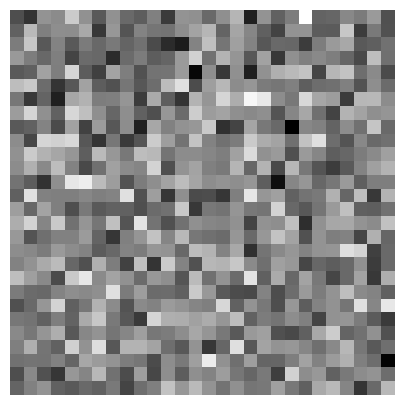

In [ ]:
plot(W[:,0].reshape(28,28)) #reshape the 1D tensor representing the weights into a 28x28 grid (assuming each input feature corresponds to a pixel in a 28x28 image) and then plot it.

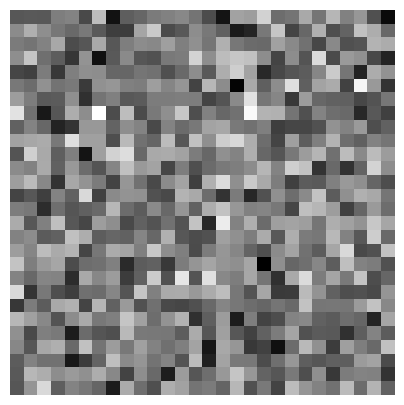

In [ ]:
plot(W[:,2].reshape(28,28)) #eshape the 1D tensor representing the weights connecting the input features to the third output neuron into a 28x28 grid (assuming each input feature corresponds to a pixel in a 28x28 image) and then plot it.

In [ ]:
W.shape #indicates the number of input and output neurons in the neural network.

torch.Size([784, 10])

In [ ]:
(W.T).shape #(W.T) represents the transpose of the weight matrix W.

torch.Size([10, 784])

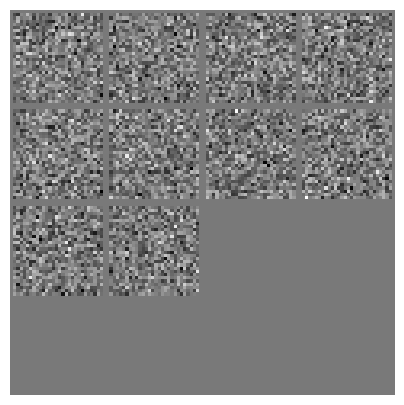

In [ ]:
montage_plot((W.T).reshape(10,28,28).cpu().detach().numpy())
#This code reshapes the transposed weight matrix (W.T) into a 3D array with dimensions (10, 28, 28) and then passes it to the montage_plot function for visualization.

In [ ]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s
    #This function is commonly used in neural networks for converting raw scores or logits into probabilities across multiple classes.

In [ ]:
def cross_entropy(outputs, labels):
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]
    #function in classification tasks, particularly in neural network models, to measure the dissimilarity between predicted probabilities and ground truth labels. It penalizes the model more heavily for confidently incorrect predictions.

In [ ]:
def acc(out,y):
    return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]
    #evaluate the performance of classification models by measuring the proportion of correctly predicted samples in the dataset.

In [ ]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b)
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y
    #facilitates the creation of mini-batches during training or testing, which is a common practice in machine learning to improve efficiency and convergence during optimization. The batch size is typically set to a specific value, which can be adjusted through the configuration c.

In [ ]:
def model(x,w):

    return x@w[0]
    #This function can be used as a simple linear regression model to predict outputs based on input features.

In [ ]:
def gradient_step(w):

    w[0].data = w[0].data - c.L*w[0].grad.data

    w[0].grad.data.zero_()
    #this function implements a basic gradient descent update step, where the weights are adjusted in the opposite direction of the gradients with a magnitude proportional to the learning rate. This process iterates to minimize the loss function and improve the model's performance during training.

In [ ]:
def make_plots():

    acc_train = acc(model(x,w),y)

    xt,yt = get_batch('test')

    acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train, "acc_test": acc_test})
    #this function provides a convenient way to monitor the model's accuracy on both training and test datasets and log the results using Weights & Biases for further analysis.

In [ ]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z
    #This function can be used to initialize the weights of neural networks with samples from a truncated normal distribution, which is a common practice to ensure stable training.

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


<ipython-input-19-c3d856de2607>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))


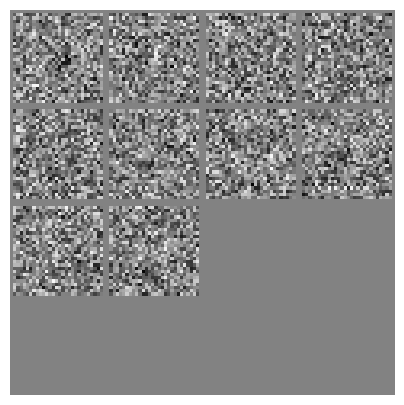

acc_test,▁▁▂▃▃▃▃▄▄▄▅▅▅▆▆▇▇▇▆▇▇▇▇▇▇█▇▇▇▇█▇▇▇█▇██▇▇
acc_train,▁▁▂▃▃▃▄▄▅▅▅▅▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇█████████▇███
acc_test,0.62598
acc_train,0.63965


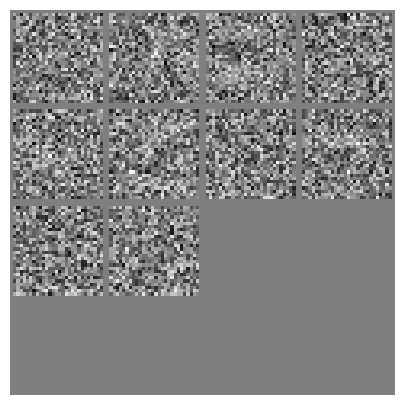

acc_test,▁▂▃▂▄▅▄▅▅▆▆▇▆▇▇▇▇▇▇▇██▇▇▇███▇▇████▇███▇█
acc_train,▁▂▂▃▃▄▄▅▅▅▆▆▇▆▇▇▇█▇██▇▇▇▇█▇▇██▇▇█▇▇▇██▇▇
acc_test,0.45898
acc_train,0.44531


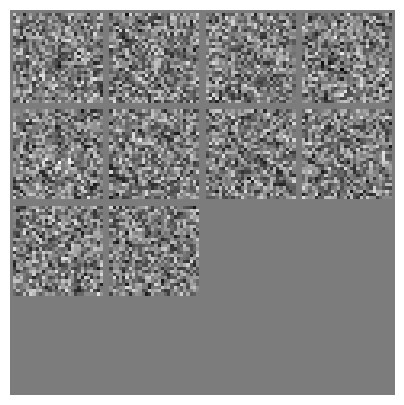

In [ ]:
for run in range(3):

    wb.init(project="Simple_Linear_SGD_123");
    c = wb.config

    c.L = 0.1
    c.b = 1024
    c.epochs = 10000

    w = [GPU(Truncated_Normal((784,10)))]

    for i in range(c.epochs):

        x,y = get_batch('train')

        out = model(x,w)

        loss = cross_entropy(softmax(out),y)

        loss.backward()

        gradient_step(w)

        make_plots()

        if (i+1) % 10000 == 0: montage_plot((w[0].T).reshape(10,28,28).cpu().detach().numpy())
        #This script demonstrates a simple training loop using SGD for a linear model with softmax activation for multi-class classification, logging the training progress and visualizing the learned weights using Weights & Biases.

acc_test,▁▂▃▃▄▃▄▅▅▆▆▇▇▇▇▇█▇█▇▇▇▇▇▇███▇██▇█▇██▇▇██
acc_train,▁▁▃▃▄▄▃▄▅▆▆▇▆▇▇▇▇▇▇▇▇█▇▇▇██▇▇█████▇██▇██
acc_test,0.41309
acc_train,0.39062


<ipython-input-19-c3d856de2607>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))


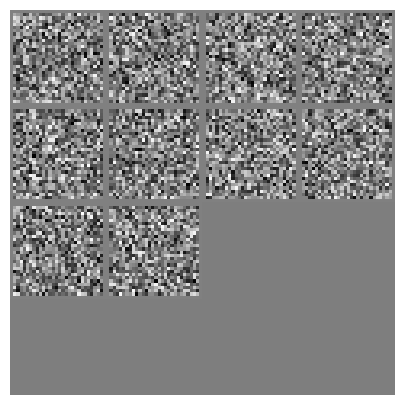

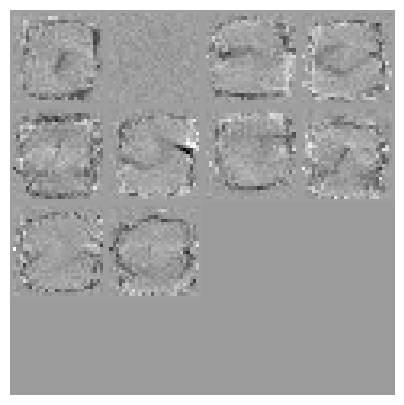

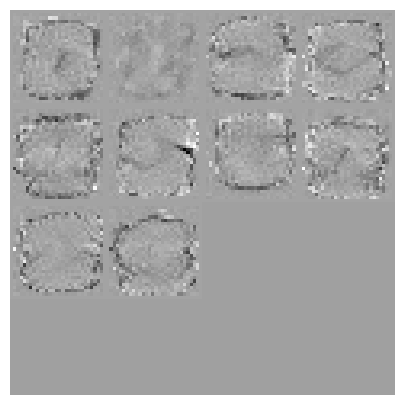

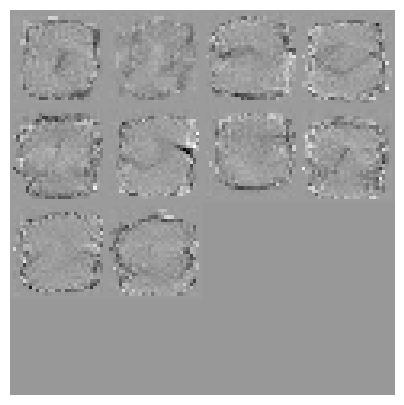

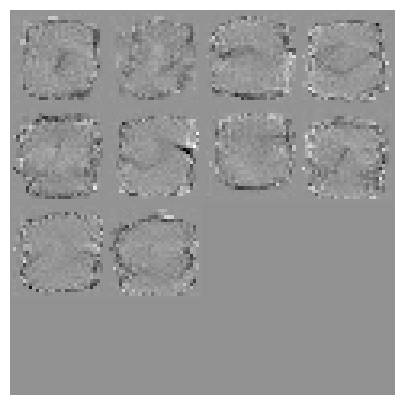

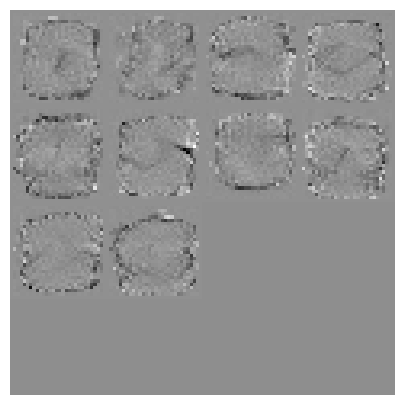

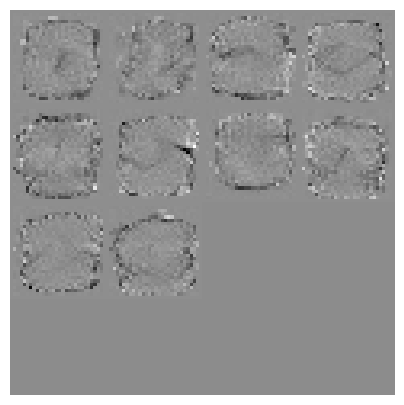

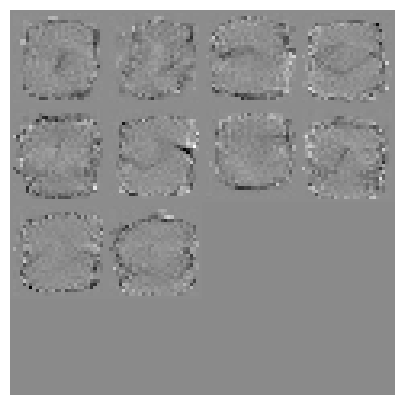

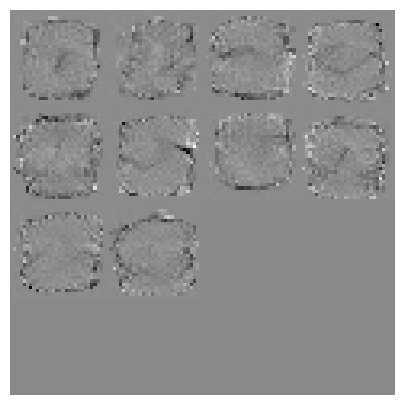

In [ ]:
for run in range(100):

    wb.init(project="Simple_Linear_Adam_2");
    c = wb.config

    c.L = 0.01
    c.b = 1024
    c.epochs = 100000

    w = [GPU(Truncated_Normal((784,10)))]

    optimizer = torch.optim.Adam(w, lr=c.L)

    for i in range(c.epochs):

        x,y = get_batch('train')

        loss = cross_entropy(softmax(model(x,w)),y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        wb.log({"loss": loss})

        make_plots()

        if i % 10000 == 0 : montage_plot((w[0].T).reshape(10,28,28).cpu().detach().numpy())
        #This script trains a simple linear model using the Adam optimizer with Weights & Biases (wandb) logging for monitoring and visualization. It runs for 100 iterations, each time initializing a new wandb run with different configurations.


### Autoencoder


In [ ]:
def get_batch(mode):
    b = 1024
    if mode == "train":
        r = np.random.randint(X.shape[0]-b)
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y
    #This function continues to facilitate the creation of mini-batches during training or testing, which is a common practice in machine learning to improve efficiency and convergence during optimization. The batch size remains fixed at 1024 for both training and testing.

In [ ]:
X = X.reshape(X.shape[0],1,28,28)
X_test = X_test.reshape(X_test.shape[0],1,28,28)
#After reshaping, X and X_test are 4D arrays where each image is represented as a 1-channel (grayscale) image with dimensions 28x28 pixels. This format is suitable for inputting into CNN models for tasks such as image classification.

In [ ]:
import torchvision
from torch.nn.functional import *
#you gain access to a rich set of tools and functionalities for building and training neural networks, particularly for tasks related to computer vision.

In [ ]:
X = torchvision.transforms.functional.normalize(X,0.5,0.5)
X_test = torchvision.transforms.functional.normalize(X_test,0.5,0.5)
#the input data is transformed to have a consistent scale and zero mean, which can help improve the convergence and stability of the training process, especially for deep learning models.

In [ ]:
def Encoder(x,w):
    x = relu(conv2d(x,w[0], stride=(2, 2), padding=(1, 1)))
    x = relu(conv2d(x,w[1], stride=(2, 2), padding=(1, 1)))
    x = x.view(x.size(0), 6272)
    x = linear(x,w[2])
    return x
    #transforms input data x into a lower-dimensional representation through convolutional operations followed by flattening and linear transformation. This lower-dimensional representation can capture important features of the input data, which can be useful for downstream tasks such as classification, clustering, or generation.

In [ ]:
def Decoder(x,w):
    x = linear(x,w[3])
    x = x.view(x.size(0), 128, 7, 7)
    x = relu(conv_transpose2d(x,w[4], stride=(2, 2), padding=(1, 1)))
    x = torch.tanh(conv_transpose2d(x,w[5], stride=(2, 2), padding=(1, 1)))
    return x
    #transforms input data x into a lower-dimensional representation through convolutional operations followed by flattening and linear transformation. This lower-dimensional representation can capture important features of the input data, which can be useful for downstream tasks such as classification, clustering, or generation.

In [ ]:
def Autoencoder(x,w):
    return Decoder(Encoder(x,w),w)
    #By combining the encoder and decoder modules, the autoencoder learns to reconstruct the input data while also learning useful representations of the data in the lower-dimensional space. This process enables tasks such as data denoising, dimensionality reduction, and feature learning without requiring labeled data.

In [ ]:
num_steps = 1000
batch_size = 512
learning_rate = 1e-3

In [ ]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from PIL import Image
from imageio import *
import torch
from skimage.transform import resize
from mpl_toolkits.axes_grid1.axes_rgb import make_rgb_axes, RGBAxes
from torchvision.models import *
from torchvision.datasets import MNIST,KMNIST,FashionMNIST
from skimage.util import montage

In [ ]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [ ]:
#Encode
w0 = GPU(randn_trunc((64,1,4,4)))
w1 = GPU(randn_trunc((128,64,4,4)))
w2 = GPU(randn_trunc((10,6272)))
#Decode
w3 = GPU(randn_trunc((6272,10)))
w4 = GPU(randn_trunc((128,64,4,4)))
w5 = GPU(randn_trunc((64,1,4,4)))

w = [w0,w1,w2,w3,w4,w5]

optimizer = torch.optim.Adam(params=w, lr=learning_rate)

for i in range(num_steps):

    x_real,y = get_batch('train')

    x_fake = Autoencoder(x_real,w)

    loss = torch.mean((x_fake - x_real)**2)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if i % 100 == 0: print(loss.item())

1.3809499740600586
0.15917131304740906
0.12460803985595703
0.10375986993312836
0.0995921716094017
0.0906553640961647
0.09479115903377533
0.08056606352329254
0.07921730726957321
0.07698258757591248


In [ ]:
image_batch,y = get_batch('test')

In [ ]:
image_batch_recon = Autoencoder(image_batch,w)

In [ ]:
torch.mean((image_batch_recon - image_batch)**2)

tensor(0.0759, device='cuda:0', grad_fn=<MeanBackward0>)

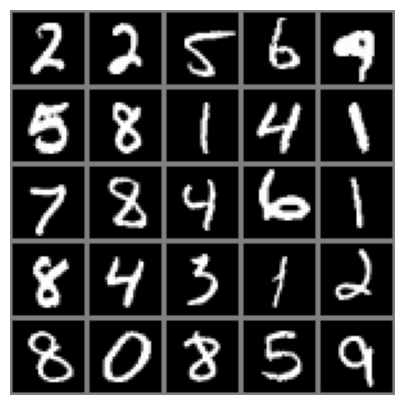

In [ ]:
montage_plot(image_batch[0:25,0,:,:].cpu().detach().numpy())

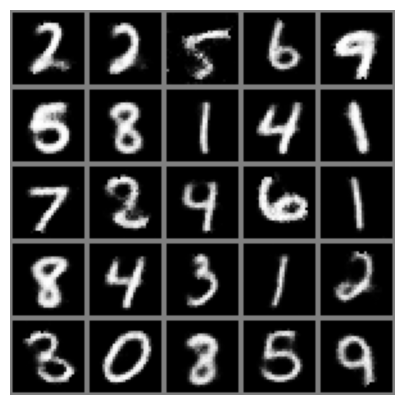

In [ ]:
montage_plot(image_batch_recon[0:25,0,:,:].cpu().detach().numpy())


### Generator



In [ ]:
latent_size = 64
hidden_size = 256
image_size = 784
b = 1024

In [ ]:
#MNIST
# train_set = MNIST('./data', train=True, download=True)
# test_set = MNIST('./data', train=False, download=True)

#KMNIST
#train_set = KMNIST('./data', train=True, download=True)
#test_set = KMNIST('./data', train=False, download=True)

#Fashion MNIST
train_set = FashionMNIST('./data', train=True, download=True)
test_set = FashionMNIST('./data', train=False, download=True)

In [ ]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()
X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255
X = (X - 0.5)/0.5
X_test = (X_test - 0.5)/0.5

In [ ]:
n = 7

index = np.where(Y == n)
X = X[index]
index = np.where(Y_test == n)
X_test = X_test[index]

In [ ]:
X.shape,Y.shape,X_test.shape,Y_test.shape

((6000, 1, 28, 28), (60000,), (1000, 1, 28, 28), (10000,))

In [ ]:
###################################################

In [ ]:
X = GPU_data(X)
X_test = GPU_data(X_test)
Y = GPU_data(Y)
Y_test = GPU_data(Y_test)

In [ ]:
x,y = get_batch('train')

In [ ]:
x.shape

torch.Size([1024, 1, 28, 28])

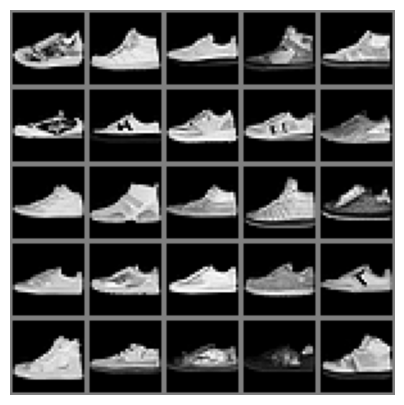

In [ ]:
montage_plot(x[0:25,0,:,:].detach().cpu().numpy())

In [ ]:
#D
w0 = GPU(randn_trunc((64,1,4,4)))
w1 = GPU(randn_trunc((128,64,4,4)))
w2 = GPU(randn_trunc((1,6272)))
#G
w3 = GPU(randn_trunc((6272,64)))
w4 = GPU(randn_trunc((128,64,4,4)))
w5 = GPU(randn_trunc((64,1,4,4)))

w = [w0,w1,w2,w3,w4,w5]

In [ ]:
def D(x,w):
    x = relu(conv2d(x,w[0], stride=(2, 2), padding=(1, 1)))
    x = relu(conv2d(x,w[1], stride=(2, 2), padding=(1, 1)))
    x = x.view(x.size(0), 6272)
    x = linear(x,w[2])
    x = torch.sigmoid(x)
    return x

In [ ]:
def G(x,w):
    x = linear(x,w[3])
    x = x.view(x.size(0), 128, 7, 7)
    x = relu(conv_transpose2d(x,w[4], stride=(2, 2), padding=(1, 1)))
    x = torch.tanh(conv_transpose2d(x,w[5], stride=(2, 2), padding=(1, 1)))
    return x

In [ ]:
b = 1024

In [ ]:
batch_size = b

In [ ]:
batch_size

1024

In [ ]:
d_optimizer = torch.optim.Adam(w[0:3], lr=0.0002)
g_optimizer = torch.optim.Adam(w[3:], lr=0.0002)

real_labels = (torch.ones(batch_size, 1).cuda())
fake_labels = (torch.zeros(batch_size, 1).cuda())

In [ ]:
num_epochs = 500
batches = X.shape[0]//batch_size
steps = num_epochs*batches

In [ ]:
z1 = (torch.randn(steps,batch_size,latent_size).cuda())
z2 = (torch.randn(steps,batch_size,latent_size).cuda())

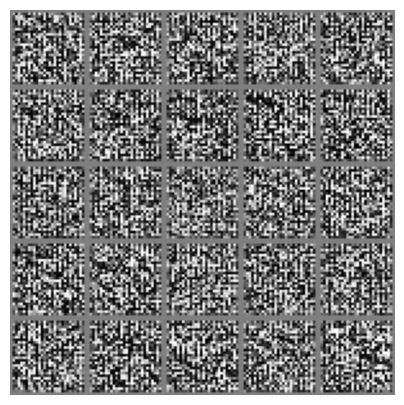

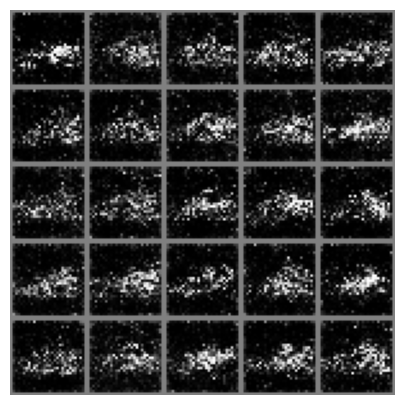

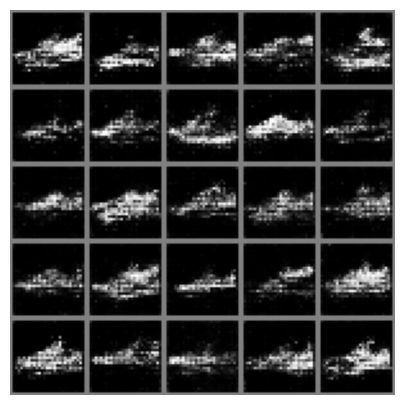

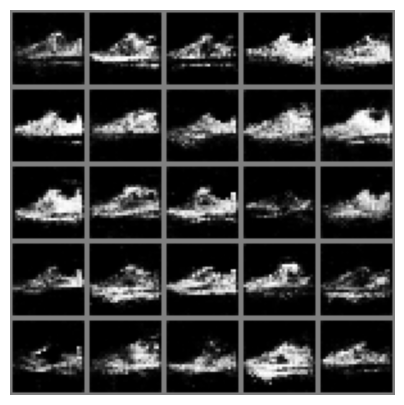

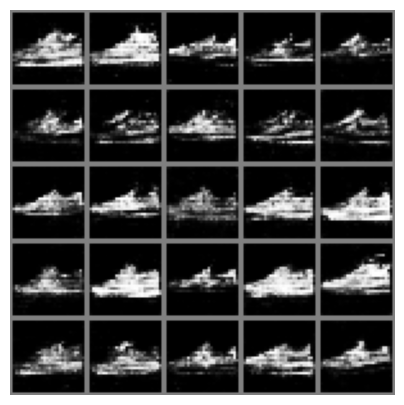

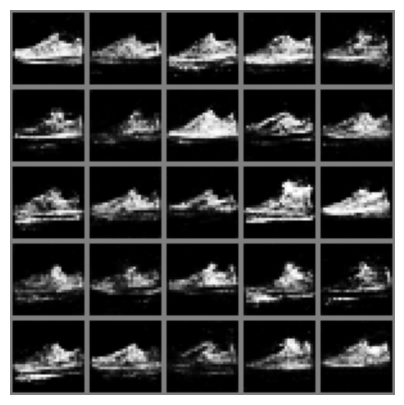

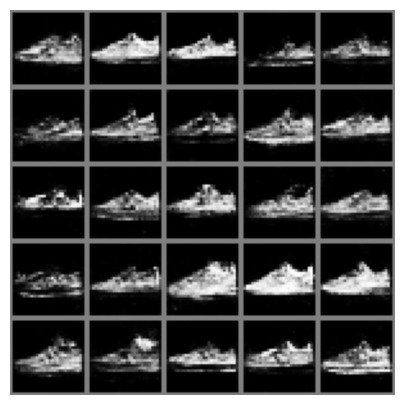

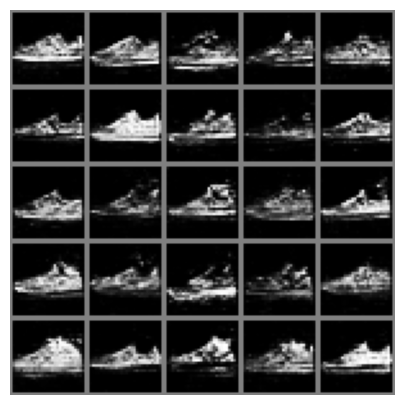

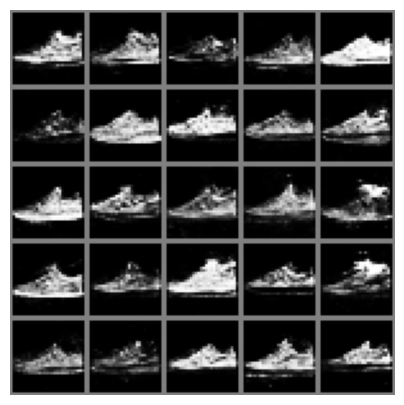

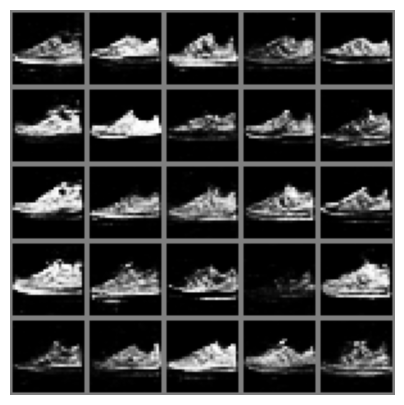

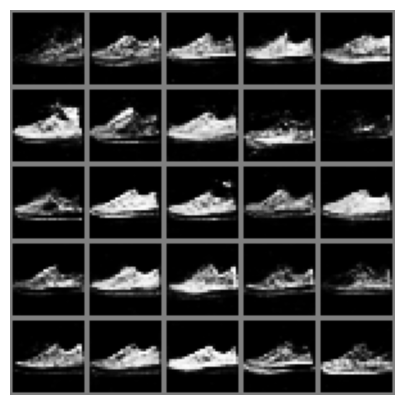

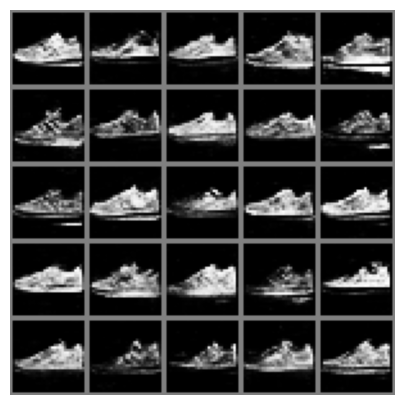

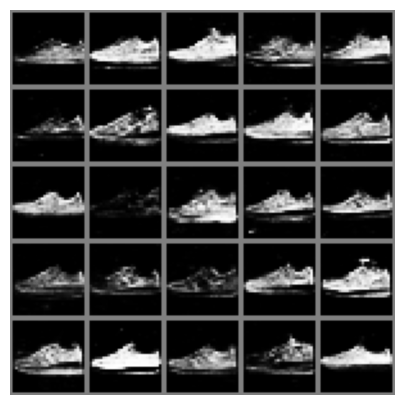

In [ ]:
for i in range(steps):

    images,y = get_batch('train')

    d_loss = binary_cross_entropy(D(images,w), real_labels) + binary_cross_entropy(D(G(z1[i],w),w), fake_labels)
    d_optimizer.zero_grad()
    d_loss.backward()
    d_optimizer.step()


    g_loss = binary_cross_entropy(D(G(z2[i],w),w), real_labels)
    g_optimizer.zero_grad()
    g_loss.backward()
    g_optimizer.step()


    if i % 200 == 0:
        out = G(z1[np.random.randint(steps)],w)
        montage_plot(out.view(batch_size,1,28,28).detach().cpu().numpy()[0:25,0,:,:])

In [ ]:
z1[np.random.randint(steps)].shape

torch.Size([512, 64])

In [ ]:
noise = GPU_data(torch.randn(1,64))

In [ ]:
output = G(noise,w)

In [ ]:
output.shape

torch.Size([1, 1, 28, 28])

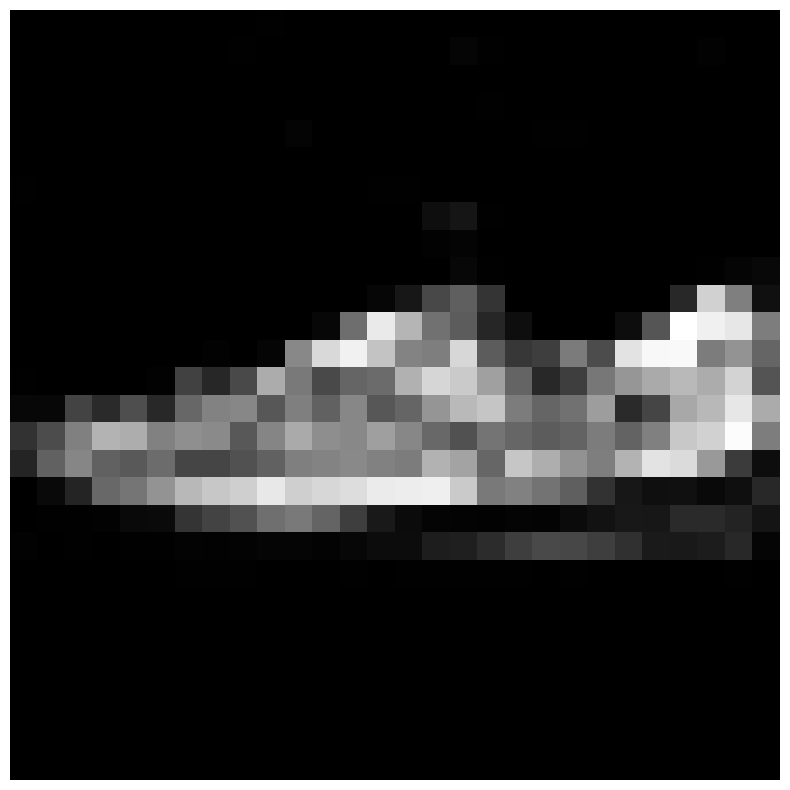

In [ ]:
plot(output[0,0])